## The Data Map

<img src= '../images/map.jpg'>

# Load libraries

In [ ]:
https://us-prod.asyncgw.teams.microsoft.com/v1/objects/0-eus-d18-3d4d80e29d78f22fac57c77d155eb3c0/views/imgo

In [ ]:
https://us-prod.asyncgw.teams.microsoft.com/v1/objects/0-eus-d13-4100a5bf2bc55e05bfd4ebe7f22f13a2/views/imgo

In [2]:
# Import pandas under the alias pd
import pandas as pd

## Load a DataFrame

Let's load a csv file.

A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

In [4]:
# Load the CSV credit_records.csv
baby = pd.read_csv('../data/13. Importando datos en Python/baby.csv')

## Inspecting a DataFrame
Let's learn more about the structure of this DataFrame.

In [3]:
baby.head()

,BRITH_YEAR,GENDER,ETHNICTY,NAME,COUNT,RANK
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


### Two methods for selecting columns

You can use brackets on a dataframe or dot notation to select a column

In [4]:
# Use brackets
items = baby.NAME
items.head()

0    GERALDINE
1          GIA
2       GIANNA
3      GISELLE
4        GRACE
Name: NAME, dtype: object

In [5]:
# Use dot notation
items = baby['NAME']
items.head()

0    GERALDINE
1          GIA
2       GIANNA
3      GISELLE
4        GRACE
Name: NAME, dtype: object

### Inspect the DataFrame using `.info()`

We can quickly check the overall strcuture of our dataframe.

In [5]:
baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13962 entries, 0 to 13961
Data columns (total 6 columns):
BRITH_YEAR    13962 non-null int64
GENDER        13962 non-null object
ETHNICTY      13962 non-null object
NAME          13962 non-null object
COUNT         13962 non-null int64
RANK          13962 non-null int64
dtypes: int64(3), object(3)
memory usage: 654.6+ KB


## Working a Dataframe

### Logical testing

Let's practice writing logical statements and displaying the output.

Recall that we use the following operators:

- `==` tests that two values are equal.
- `!=` tests that two values are not equal.
- `>` and < test that greater than or less than, respectively.
- `>=` and <= test greater than or equal to or less than or equal to, respectively.

In [39]:
baby[baby.ETHNICTY == 'HISPANIC'].head()

,BRITH_YEAR,GENDER,ETHNICTY,NAME,COUNT,RANK
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [21]:
baby[baby.NAME == 'EMMA']

,BRITH_YEAR,GENDER,ETHNICTY,NAME,COUNT,RANK
319,2011,FEMALE,WHITE NON HISPANIC,EMMA,213,2
1009,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
1161,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40
1398,2011,FEMALE,HISPANIC,EMMA,114,11
2481,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
2633,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40
2870,2011,FEMALE,HISPANIC,EMMA,114,11
3203,2011,FEMALE,WHITE NON HISPANIC,EMMA,213,2
3981,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
4133,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40


## Grouping

Get aggregated statistics and analyze!

In [22]:
yearly_count = baby.groupby(['BRITH_YEAR'])['COUNT'].sum().reset_index()
yearly_count

,BRITH_YEAR,COUNT
0,2011,271696
1,2012,70730
2,2013,69344
3,2014,70361


## Plotting a Dataframe

Most of the time is easier to see plots that huge tables, so we are going to plot!

In [20]:
from matplotlib import pyplot as plt

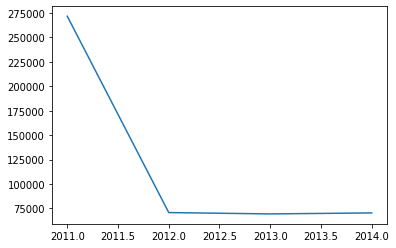

In [21]:
plt.plot(yearly_count.BRITH_YEAR, yearly_count.COUNT)
plt.show()

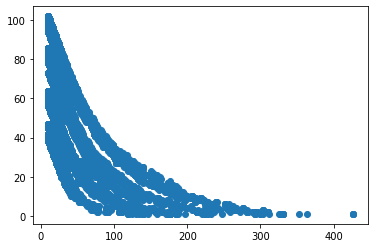

In [22]:
plt.scatter(baby.COUNT, baby.RANK)
plt.show()

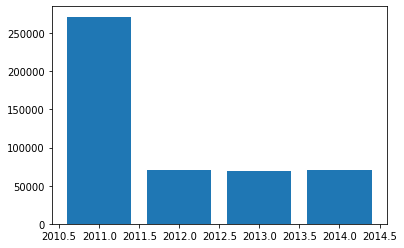

In [24]:
plt.bar(yearly_count.BRITH_YEAR, yearly_count.COUNT)
plt.show()

## Adding to plots

We can add a lot of things to our plots:
- Legends
- Labels
- Floating text
- Styles

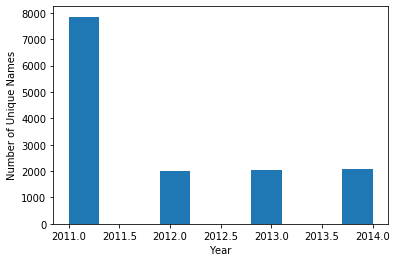

In [14]:
plt.hist(baby.BRITH_YEAR)
plt.xlabel('Year')
plt.ylabel('Number of Unique Names')
plt.show()

## Putting it all together!

We will see how to work around a lot of problems and have fun in the meanwhile!

In [15]:
data = baby.groupby(['BRITH_YEAR','ETHNICTY'])['COUNT'].sum().reset_index()
data = pd.pivot_table(data, values='COUNT', index='BRITH_YEAR', columns='ETHNICTY', fill_value=0).reset_index()
data

ETHNICTY,BRITH_YEAR,ASIAN AND PACI,ASIAN AND PACIFIC ISLANDER,BLACK NON HISP,BLACK NON HISPANIC,HISPANIC,WHITE NON HISP,WHITE NON HISPANIC
0,2011,0,32252,0,42164,97768,0,99512
1,2012,10300,0,10208,0,23547,26675,0
2,2013,0,9293,0,10144,23067,0,26840
3,2014,0,9834,0,9957,22855,0,27715


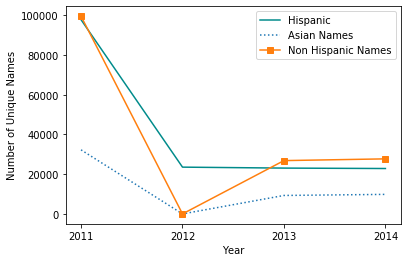

In [18]:
# Change the color of Phoenix to `"DarkCyan"`
plt.plot(data["BRITH_YEAR"], data["HISPANIC"], label="Hispanic", color="DarkCyan")

# Make the Los Angeles line dotted
plt.plot(data["BRITH_YEAR"], data["ASIAN AND PACIFIC ISLANDER"], label="Asian Names", linestyle=':')

# Add square markers to Philedelphia
plt.plot(data["BRITH_YEAR"], data["WHITE NON HISPANIC"], label="Non Hispanic Names", marker='s')

# Add a legend
plt.legend()

plt.xlabel('Year')
plt.ylabel('Number of Unique Names')

plt.xticks([2011, 2012, 2013, 2014])

# Display the plot
plt.show()